# 이미지 식별 머신을 위한 데이터를 준비한다.

## 필요한 라이브러리를 불러 온다.

In [31]:
import sys
print(sys.executable)

c:\Users\June\AppData\Local\Programs\Python\Python38\python.exe


In [32]:
# 데이터 플로팅 라이브러리
import matplotlib.pyplot as plt # 데이터/이미지 시각화 라이브러리
# 숫자 처리 라이브러리
import numpy as np # 숫자 , 행렬 등의 계산 라이브러리
# 딥러닝을 위한 파이토치 라이브러리
import torch 
from torch import nn, optim
# 토치비전 라이브러리
import torchvision  # Vision AI모델을 위한 라이브러리
from torchvision import datasets, transforms, models
# 이미지 처리 라이브러리 (PIL, pillow)
from PIL import Image
# 주피터 노트북에서 plot이 보이도록 설정
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 디렉토리, 분할 비율, 변환 방법을 설정한다.

In [33]:
# 이미지 데이터가 있는 디렉토리와 데이터 세트 분할 비율(valid_size)을 정한다.
data_dir = './data' # 이미지 데이터 디렉토리 (‘.’ 은 현재 디렉토리를의미함)
valid_size = 0.2 # 학습 데이터와 검증(테스트) 데이터의 분할 비율(8:2)

# 이미지 데이터를 ResNet50에서 다룰 수 있도록 변환시키는 방법을 정한다. (t_transforms)/이미지 데이터의 변환 (transform) 방법을 설정함
t_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.Resize(224),
                transforms.ToTensor()
])

### (확인) 변환 방법을 출력하여 확인해 본다.

In [34]:
# 설정한 이미지 데이터 변환 방법을 출력하여 확인한다.
print(t_transforms)

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


## 데이터 로더 함수를 작성한다.

### (연습) trainloader와 testloader를 만들어 본다.

#### 1. 학습 데이터 세트 및 테스트 데이터 세트의 디렉토리 및 변환 방식을 지정한다.

In [35]:
# datasets.ImageFolder를 사용해서 학습 데이터(train_data)와 테스트 데이터(test_data)를 만든다.
train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
test_data = datasets.ImageFolder(data_dir, transform=t_transforms)

# 학습 데이터의 형식을 확인한다.
print(train_data)

# 학습 데이터와 테스트 데이터의 길이를 확인한다.
print(len(train_data), len(test_data))

Dataset ImageFolder
    Number of datapoints: 155
    Root location: ./data
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
155 155


#### 2. 데이터세트를 섞기 위해, 우선 인덱스를 만들어 랜덤하게 섞는다.

In [36]:
# train_data 사이즈만큼의 정수값을 갖는 인덱스 리스트(indices)를 만들고 확인한다.
num_train = len(train_data)
indices = list(range(num_train)) # 데이터 개수만큼 연속된 정수로 구성된(range) 인덱스 리스트(indices list)를 만든 후 출력

print(indices)

# 인덱스 리스트를 랜덤하게 섞고 확인한다.
np.random.shuffle(indices) # 인덱스 리스트(indices list)를 임의로 섞은 후 출력
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
[98, 33, 49, 74, 73, 124, 4, 41, 48, 71, 53, 29, 6, 61, 95, 59, 0, 128, 104, 1, 68, 16, 58, 152, 133, 114, 46, 37, 23, 110, 34, 88, 64, 70, 72, 60, 117, 144, 18, 142, 19, 136, 120, 87, 47, 35, 39, 78, 36, 9, 3, 125, 109, 42, 150, 143, 129, 102, 149, 100, 106, 12, 2, 132, 115, 77, 107, 103, 32, 11, 28, 15, 119, 138, 148, 113, 44, 81,

#### 3. 분할 비율(valid_size)에 따른 지점의 인덱스 값(split)을 계산한다.

In [37]:
# 분할 비율(valid_size)에 해당하는 인덱스를 계산하고 확인해 본다.
split = int(np.floor(num_train * valid_size)) # np.floor( ) 함수 : 바닥함수 / 데이터 개수와 분할 비율을 곱하여 split 지점 계산

print(split)

31


#### 4. split을 기준으로 학습 데이터 인덱스 리스트와 테스트 인덱스 리스트로 나눈다.

In [38]:
# 학습 데이터 인덱스 리스트 및 테스트 인덱스 리스트를 만들고 확인해 본다.
train_idx, test_idx = indices[split:], indices[:split] # Train_index와 test_index로 분할

print(train_idx)
print(test_idx)

[88, 64, 70, 72, 60, 117, 144, 18, 142, 19, 136, 120, 87, 47, 35, 39, 78, 36, 9, 3, 125, 109, 42, 150, 143, 129, 102, 149, 100, 106, 12, 2, 132, 115, 77, 107, 103, 32, 11, 28, 15, 119, 138, 148, 113, 44, 81, 135, 123, 139, 45, 65, 75, 66, 131, 5, 96, 90, 94, 20, 82, 80, 22, 154, 108, 50, 127, 17, 116, 79, 140, 111, 8, 118, 31, 99, 57, 69, 63, 14, 101, 26, 130, 93, 105, 137, 112, 89, 91, 56, 151, 121, 141, 67, 24, 52, 55, 122, 54, 62, 76, 153, 10, 146, 7, 21, 43, 145, 134, 92, 84, 30, 126, 51, 147, 85, 86, 38, 97, 40, 13, 83, 25, 27]
[98, 33, 49, 74, 73, 124, 4, 41, 48, 71, 53, 29, 6, 61, 95, 59, 0, 128, 104, 1, 68, 16, 58, 152, 133, 114, 46, 37, 23, 110, 34]


#### 5. 데이터 세트들의 샘플러 및 로더를 만들고 확인한다.

In [39]:
# 데이터 샘플링 방식(SubsetRandomSampler)을 지정한다 / 카테고리 = 클래스 = 범주
from torch.utils.data.sampler import SubsetRandomSampler # Torch.utils.data.sample에서 SubsetRandomSampler import
train_sampler = SubsetRandomSampler(train_idx) # 섞은 인덱스 리스트를 이용 하여 데이터 샘플러 생성
test_sampler = SubsetRandomSampler(test_idx)

# 데이터 로딩을 위한 loader를 만든다. (sampler, 배치 사이즈 등 지정)
trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16) # 데이터세트에 샘플러와 배치 당 샘플 수 (배치 사이즈)를 지정하여 데이터 로더 생성

# 학습 loader와 테스트 loader의 class들을 출력하여 확인한다.
print(trainloader.dataset.classes)
print(testloader.dataset.classes) # 각 데이터의 class 확인

['Basalt', 'Highland']
['Basalt', 'Highland']


### 코드들을 묶어서 load_split_train_test() 함수를 만든다.

In [40]:
# 위의 코드들을 묶어서 load_split_train_test() 함수를 만든다. (입력 : 데이터 디렉토리, 분할 비율) (출력 : 학습 데이터 로더, 테스트 데이터 로더)

def load_split_train_test(data_dir, valid_size) :
    t_transforms = transforms.Compose([
                    transforms.RandomResizedCrop(224),
                    transforms.Resize(224),
                    transforms.ToTensor()
])

    train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    test_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))

    np.random.shuffle(indices)
    split = int(np.floor(num_train * valid_size))
    train_idx, test_idx = indices[split:], indices[:split]
    from torch.utils.data.sampler import SubsetRandomSampler # Torch.utils.data.sample에서 SubsetRandomSampler import
    
    train_sampler = SubsetRandomSampler(train_idx) # 섞은 인덱스 리스트를 이용 하여 데이터 샘플러 생성
    test_sampler = SubsetRandomSampler(test_idx)

    # 데이터 로딩을 위한 loader를 만든다. (sampler, 배치 사이즈 등 지정)
    trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
    testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16)

    return trainloader, testloader

### load_split_train_test() 함수를 이용하여 trainloader, testloader를 생성한다.

In [41]:
# load_split_train_test() 함수를 이용하여 trainloader와 testloader를 만들고 확인한다.
trainloader, testloader = load_split_train_test(data_dir, 0.2) # 작성한 함수를 사용하여 학습 로더와 테스트 로더 생성


print(trainloader.dataset.classes)
print(testloader.dataset.classes)

['Basalt', 'Highland']
['Basalt', 'Highland']


## 이미지 데이터 샘플들을 살펴본다.

### 임의의 데이터를 로딩한 후 이미지와 레이블을 반환하는 get_random_images() 함수를 만든다.

In [42]:
def get_random_images(num) : # num : 가져올 이미지 개수

    data = datasets.ImageFolder(data_dir, transform=t_transforms)
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num] # Indices[ : num ] : 지정한 개수 만큼 별도의 인덱스 리스트 생성

    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, sampler=sampler, batch_size=num) # 배치 size를 num으로 지정하여 데이터를 로드함

    # loader에서 데이터를 한 개씩 꺼내 주는 iterator를 생성한다.
    dataiter = iter(loader) # 배치 size를 num으로 지정하여 데이터를 로드함
    images, labels = next(dataiter)

    return images, labels # 이미지들과 레이블들을 반환함

### 임의 선택한 이미지를 표시해 본다.

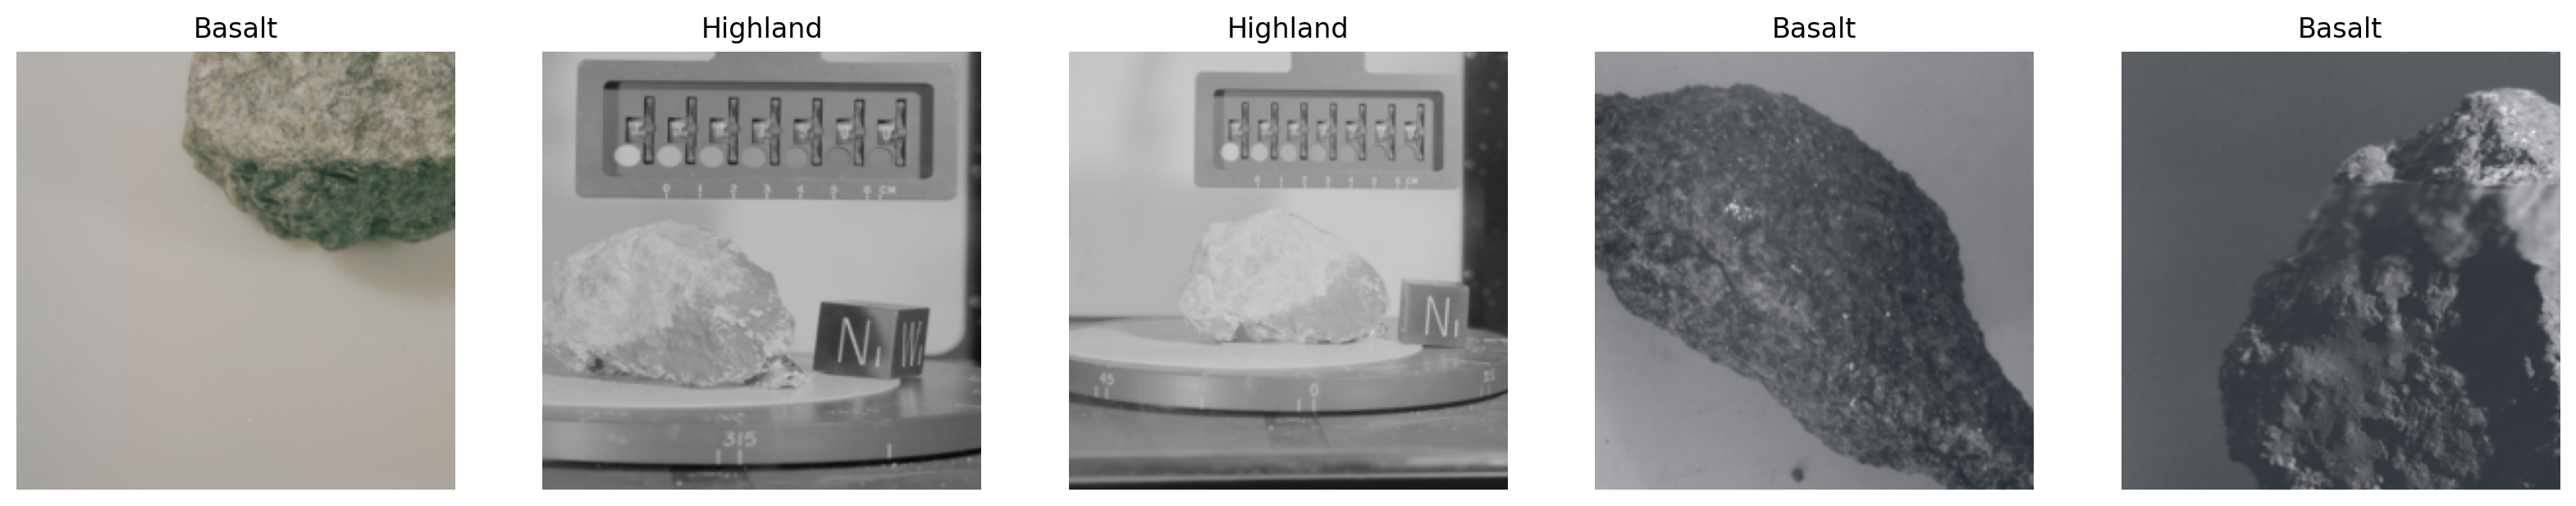

In [43]:
# 5개의 이미지와 레이블을 랜덤하게 가져온다.
images, labels = get_random_images(5)  # 5개의 이미지와 레이블을 가져옴

# 픽셀 배열을 PIL 형식의 이미지로 변환하고 이미지 크기를 지정한다.
to_pil = transforms.ToPILImage()  # 파이썬 이미지 형식(PIL)으로 변환

# 학습 데이터의 class 리스트를 얻는다.
fig = plt.figure(figsize=(20, 20))  # 이미지 크기 지정
classes = trainloader.dataset.classes  # 학습 데이터의 클래스 리스트를 얻는다.

# 이미지를 표시하기 위한 설정을 한다.
for ii in range(len(images)):  # 레이블이 추가된 이미지를 구성함
    image = to_pil(images[ii])
    sub = fig.add_subplot(1, len(images), ii + 1)
    index = labels[ii].item()
    sub.set_title(classes[index])
    plt.axis('off')
    plt.imshow(image)

# 주피터 노트북에 이미지를 표시한다.
plt.show()  # 이미지를 표시함


# ResNet50 모델을 가져와 FCL(Fully Connected Layer)을 수정한다.

## Compute device를 정한다(CPU or GPU)

In [44]:
# compute device를 정하고 확인한다.
device = torch.device('cuda') # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## 사전학습된 ResNet50 모델을 지정한다.

In [45]:
# resnet50 모델을 pretrained=True로 설정한다.
model = models.resnet50(pretrained=True)


### (확인) 수정 전의 ResNet50 모델을 확인해 본다. 

In [46]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## FCL을 수정한다.(뉴런 구축, 신경망 연결, FCL의 layer 설정 등)

In [47]:
# 모든 신경망 구축 : 전이학습을 위해 모델의 가중치를 freeze 한다.
for param in model.parameters():
    param.requires_grad = False

# 뉴런들을 연결하여 신경망을 생성한다.
model.fc = nn.Sequential(nn.Linear(2048, 512),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(512, 2),
                         nn.LogSoftmax(dim=1))

# 손실함수를 Cross entropy loss 함수로 지정한다.
criterion = nn.NLLLoss()  # 손실함수 지정 : 교차 엔트로피 손실함수

# optimizer를 Adam으로 지정한다.
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)  # 최적화함수 : Adam 최적화함수

# 신경망을 compute device로 보낸다.
model.to(device)  # Compute device로 보냄

# 종료 여부를 출력한다.
print('done!')

done!


### (확인) FCL을 확인해 본다.

In [48]:
print(model.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=512, out_features=2, bias=True)
  (4): LogSoftmax(dim=1)
)


# 모델의 FCL을 학습시키고 테스트 한다.

## 모델 학습/검증을 위한 변수를 설정한다.

In [57]:
# 에폭 및 출력 간격을 설정한다.
epochs = 30
print_every = 5

# 손실 변수들을 초기화 한다.
running_loss = 0
train_losses, test_losses = [], []

# 현재의 학습 단계를 표현하는 steps 변수를 0으로 초기화 한다.
steps = 0

## 설정한 에폭만큼 모델을 학습시키며 검증/평가 한다.

In [58]:
# 설정한 회수만큼 학습 후 검증한다.
for epoch in range(epochs) :
    # 에폭을 count 한다.
    epoch += 1
    # trainloader에서 이미지와 레이블을 하나씩 가져온다.
    for inputs, labels in trainloader:
        # 학습 단계를 count 하고 출력한다.
        steps += 1
        print('Training step ', steps)
        # 입력 데이터(이미지, 레이블)를 device로 이동시킨다.
        inputs, labels = inputs.to(device), labels.to(device)
        # 기존에 학습된 gradient 값을 초기화 한다.(이전에 학습한 값이 영향을 주지 않도록 함)
        optimizer.zero_grad()
        # 입력 데이터로 순전파를 수행하고 로그 확률을 얻는다.
        logps = model.forward(inputs)
        # 손실함수를 이용하여 손실(loss)값을 계산한다.
        loss = criterion(logps, labels)
        # 손실값을 기준으로 gradient를 update한다.
        loss.backward()
        # gradient를 이용하여 설정된 optimizer로 가중치를 update한다.
        optimizer.step()
        # 손실값을 누적/계산한다.
        running_loss += loss.item()
        # 학습 단계 5회마다 모델을 테스트/평가 한다.
        if steps % print_every == 0:
            # 손실과 정확도 변수를 초기화 한다.
            test_loss = 0
            accuracy = 0
            # 모델 평가 모드로 전환한다. (드롭아웃 등을 비활성화)
            model.eval()
            # 모델 평가 시 gradient를 계산하지 않도록 한다.
            with torch.no_grad():
                # testloader에서 이미지와 레이블을 하나씩 가져온다.
                for inputs, labels in testloader:
                    # 입력 데이터(이미지, 레이블)를 device로 이동시킨다.
                    inputs, labels = inputs.to(device), labels.to(device)
                    # 입력 데이터로 순전파를 수행하고 로그 확률을 얻는다.
                    logps = model.forward(inputs)
                    # 손실함수로 손실(loss) 값들을 계산한다.
                    batch_loss = criterion(logps, labels)
                    # 손실값을 누적시킨다.
                    test_loss += batch_loss.item()
                    # 로그 확률을 실제 확률값으로 변환한다.
                    ps = torch.exp(logps)
                    # 가장 큰 확률값과 class를 얻는다. (topk : 상위 k번째까지의 값)
                    top_p, top_class = ps.topk(1, dim=1)
                    # 정답 레이블들을 top_class와 동일한 형태로 바꾼 후 값을 비교하여, 맞춘 값들을 얻는다.
                    equals = top_class == labels.view(*top_class.shape)
                    # equals를 float 텐서로 바꾼 후 평균 정확도를 누적/계산한다.
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            # 학습 손실값과 테스트 손실값을 추가한다.
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))
            # 학습 손실값, 테스트 손실값, 테스트 정확도를 출력한다.
            print("Epoch {}/{}: ".format(epoch, epochs),
                  "Train loss: {:.3f}.. ".format(running_loss/print_every),
                  "Test loss: {:.3f}.. ".format(test_loss/len(testloader)),
                  "Test accuracy: {:.3f}\n".format(accuracy/len(testloader))) 
            # running_loss 값을 초기화 한다.
            running_loss = 0
            # 모델 학습 모드로 전환한다.
            model.train()
            break

Training step  1
Training step  2
Training step  3
Training step  4
Training step  5
Epoch 1/30:  Train loss: 0.256..  Test loss: 0.139..  Test accuracy: 1.000

Training step  6
Training step  7
Training step  8
Training step  9
Training step  10
Epoch 2/30:  Train loss: 0.357..  Test loss: 0.217..  Test accuracy: 0.902

Training step  11
Training step  12
Training step  13
Training step  14
Training step  15
Epoch 3/30:  Train loss: 0.335..  Test loss: 0.171..  Test accuracy: 0.969

Training step  16
Training step  17
Training step  18
Training step  19
Training step  20
Epoch 4/30:  Train loss: 0.358..  Test loss: 0.185..  Test accuracy: 0.938

Training step  21
Training step  22
Training step  23
Training step  24
Training step  25
Epoch 5/30:  Train loss: 0.346..  Test loss: 0.248..  Test accuracy: 0.867

Training step  26
Training step  27
Training step  28
Training step  29
Training step  30
Epoch 6/30:  Train loss: 0.348..  Test loss: 0.205..  Test accuracy: 0.902

Training step

### (확인) 학습 손실값과 테스트 손실값을 그래프로 확인한다.

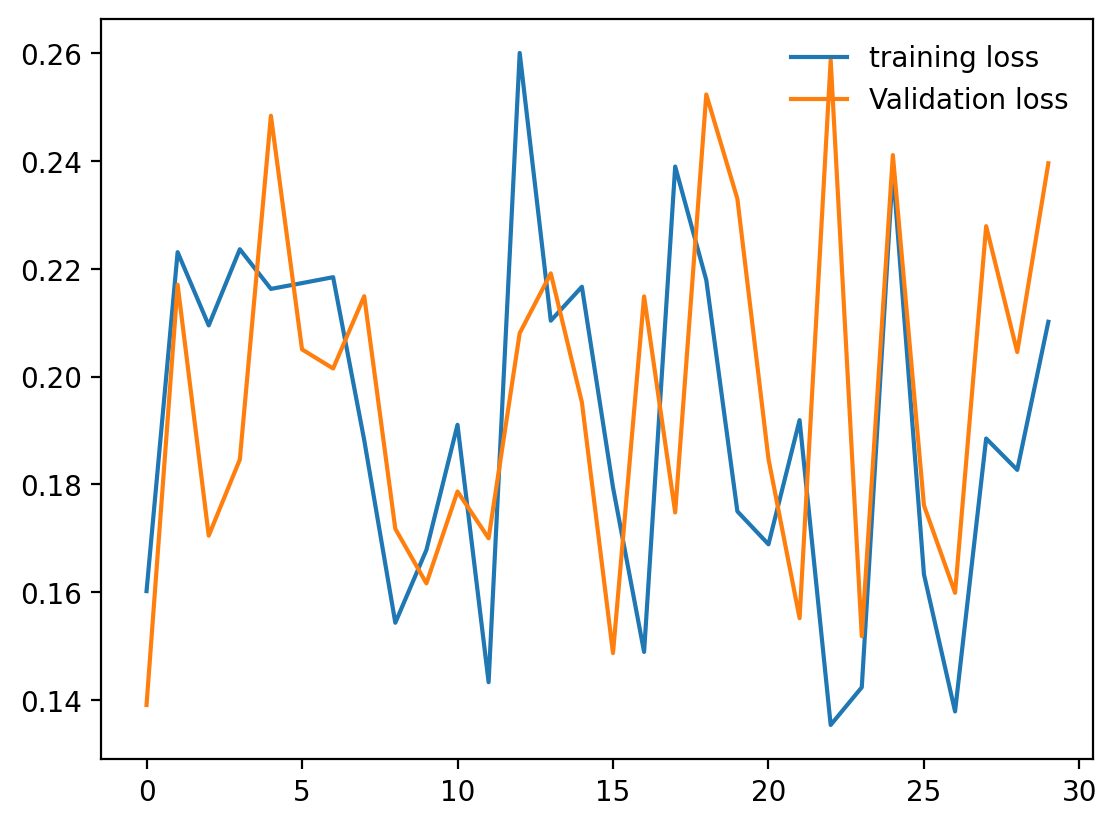

In [59]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

# 학습/테스트 완료된 모델을 저장한다.

In [60]:
# 추후 로드하여 사용할 수 있도록 학습/테스트 완료된 모델을 저장한다.
torch.save(model, 'moonrockmodel.pth')

# 완성된 모델을 사용하여 예측한다.

## 저장한 모델을 불러온다.

In [61]:
# 저장한 모델을 불러온다.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load('moonrockmodel.pth')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27984\2909459748.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('moonrockmodel.pth')


### (확인) 불러온 모델을 확인해 본다.

In [62]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 이미지 예측을 위해 predict_image() 함수를 만든다.

In [66]:
def predict_image(image):
    image_tensor = t_transforms(image).float()  # 이미지(PIL)를 텐서로 변환
    input = image_tensor.unsqueeze_(0)  # 텐서 차원 늘림(배치 고려)
    input = input.to(device)
    output = model(input)  # 모델을 통해 예측
    index = output.data.cpu().numpy().argmax()  # 더 큰 값을 갖는 인덱스 얻기

    return index

## 5개의 이미지를 임의로 가져와 예측해 본다.

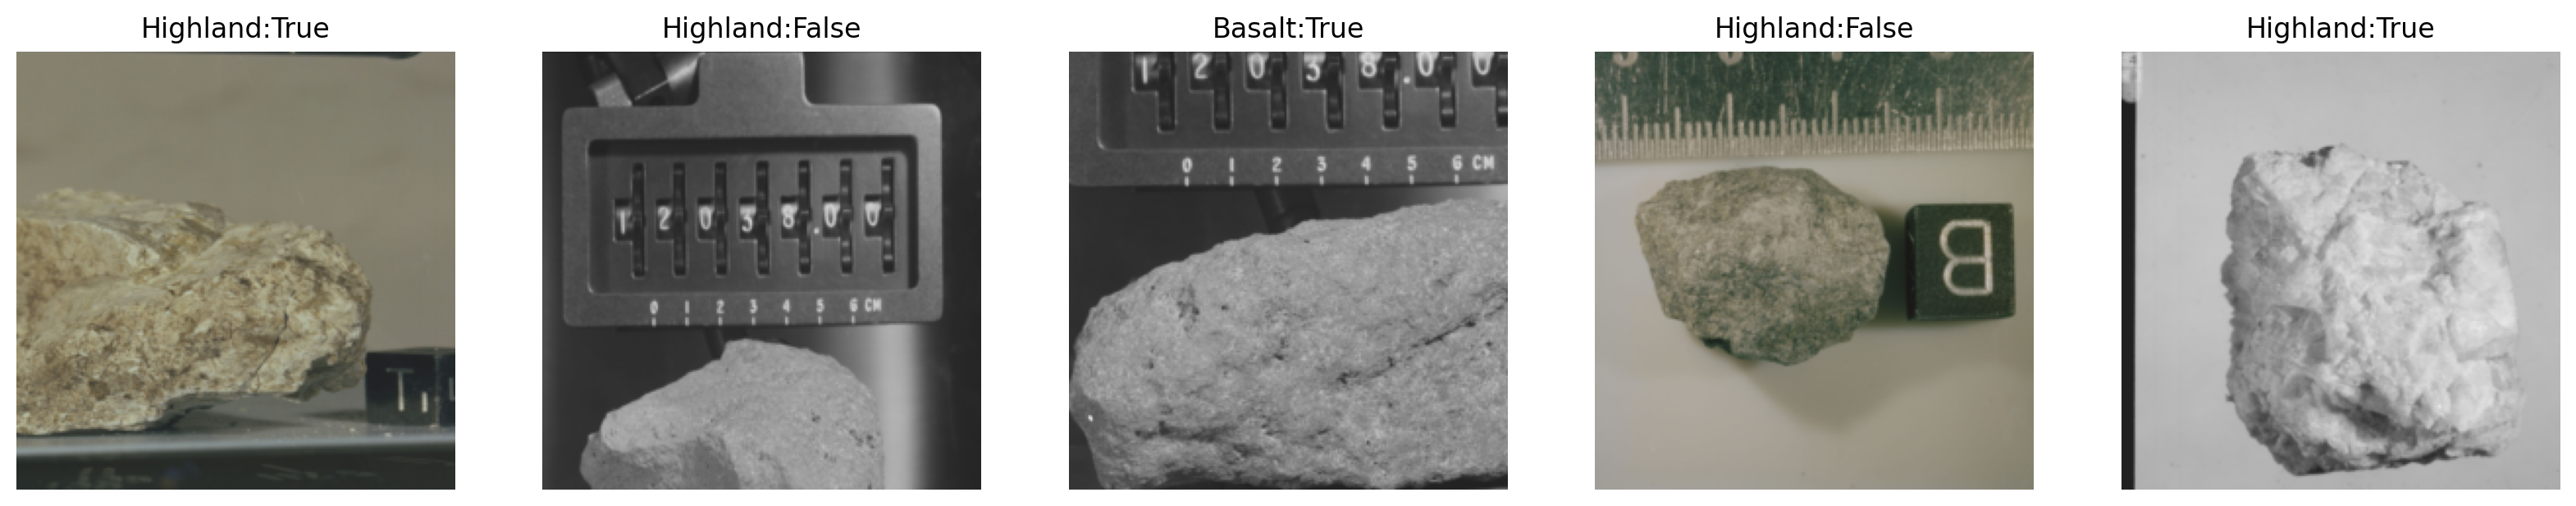

In [67]:
# 모델 평가 모드로 전환한다.
model.eval()

# ToPILImage 변환을 이용하여 텐서 이미지를 PIL 이미지로 변경하는 변환 설정
to_pil = transforms.ToPILImage()

# 5개의 이미지를 랜덤하게 가져온다.
to_pil = transforms.ToPILImage()  # 이미지 5개 가져오기
images, labels = get_random_images(5)
fig = plt.figure(figsize=(20, 20))


# 데이터의 class 목록을 얻는다.
classes = trainloader.dataset.classes



# 5개의 이미지에 대해 반복 수행한다.
for ii in range(len(images)):
    # 이미지를 PIL 이미지로 변환한다.
    image = to_pil(images[ii])
    # 이미지에 대해 예측 후, 예측된 class를 얻는다.
    index = predict_image(image)


    # 이미지 아래에 class를 표시하도록 설정한다.
    sub = fig.add_subplot(1, len(images), ii+1)
    res = labels[ii].item() == index
    sub.set_title(classes[index] + ':' + str(res))
    plt.axis('off')
    plt.imshow(image)

plt.show()